<table style="border: none" align="left">
   <tr style="border: none">
      <th style="border: none"><font face="verdana" size="4" color="black"><b>Обучение модели Keras по распознаванию рукописных цифр</b></font></th>
      <th style="border: none"><img src="https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true" alt="Watson Machine Learning icon" height="40" width="40"></th>
   </tr> 
   <tr style="border: none">
       <td style="border: none"><img src="https://github.com/pmservice/wml-sample-models/raw/master/scikit-learn/hand-written-digits-recognition/images/numbers_banner-04.png" width="600" alt="Icon"></td>
   </tr>
</table>

Этот notebook демонстрирует возможности по обучению, развертыванию и оценке модели глубокого обучения с использованием сервиса Watson Machine Learning.

Желательно знание языка Python. Этот notebook совместим с Python версии 3.5 и использует <a href="https://dataplatform.cloud.ibm.com/docs/content/analyze-data/environments-parent.html" target="_blank" rel="noopener no referrer">сервис Watson Studio.</a>


## Цели обучения

In this notebook, you will learn how to:

- Set up Watson Machine Learning service that can be used to deploy/score online a Deep Learning (Keras) model.
- Build a Deep Learning (Keras) model and train it.
- Save the trained model - `.tgz` file - in the Watson Machine Learning repository.
- Deploy the trained model online and score it.


## Содержание

1.	[Первоначальная настройка](#setup)
2.	[Обзор данных](#data)
3.  [Обучение и оценка модели](#train)
4.	[Сохранить модель локально](#save)
5.	[Создание online сервиса](#deploy)
6.	[Оценка данных](#score)
7.	[Выводы и следующие шаги](#summary)

<a id="setup"></a>
## 1. Первоначальная настройка

Before running the code in this notebook, make sure you meet the following prerequisites:

-  A <a href="https://console.ng.bluemix.net/catalog/services/ibm-watson-machine-learning/" target="_blank" rel="noopener no referrer">Watson Machine Learning (WML) Service</a> instance is installed (a free plan is offered and information about how to create the instance can be found <a href="https://dataplatform.ibm.com/docs/content/analyze-data/wml-setup.html" target="_blank" rel="noopener no referrer">here</a>.

-  Local python environment configurations:
  + Python 3.5
  + keras 2.x
  + watson-machine-learning-client (run code below to install it)
  + matplotlib

**Note:** `watson-machine-learning-client` documentation can be found <a href="http://wml-api-pyclient.mybluemix.net/" target="_blank" rel="noopener no referrer">here</a>.  
**Tip:** Run the cell below to install `watson-machine-learning-client` package from <a href="https://pypi.python.org/pypi" target="_blank" rel="noopener no referrer">PyPI</a>.

In [1]:
!rm -rf $PIP_BUILD/watson-machine-learning-client

In [2]:
!pip install --upgrade watson-machine-learning-client

Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: lomond in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: tqdm in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: tabulate in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: urllib3 in /opt/conda/envs/DSX-Python35/lib/p

**Authenticate the Watson Machine Learning service on the IBM Cloud.**

**Tip**: Authentication information (your credentials) can be found in the <a href="https://console.bluemix.net/docs/services/service_credentials.html#service_credentials" target="_blank" rel="noopener no referrer">Service credentials</a> tab of the service instance that you created on the IBM Cloud. <BR>If you cannot find the **instance_id** field in **Service Credentials**, click **New credential (+)** to generate new authentication information. 

**Action**: Enter your WML service instance credentials in the following cell.

In [3]:
wml_credentials = {
}

#### Import `watson-machine-learning-client` and authenticate the service instance.

In [4]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
client = WatsonMachineLearningAPIClient(wml_credentials)

## 2. Обзор данных <a id="data"></a>

In this section, you will check what the input data looks like.
You need `keras.datasets.mnist` and `matplotlib.pyplot` modules to see what each digit looks like.

Import the MNIST data set from the `keras.datasets.mnist` module and split the data set into training and test data sets.

In [6]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Import `matlplotlib.pyplot`.

In [7]:
import matplotlib.pyplot as plt

In [8]:
'''
Parameters of "display_digits" function:

plt     - matplotlib's pyplot module.
images  - The array of images. Ex) X_train, X_test in our example
labels  - Labels of mapping images. 
start   - Start index of "images" array.
end     - End index of "images" array.
num_row - Number of rows.
title   - Title of every image that will be displayed. Ex) Training or Test
'''
def display_digits(plt, images, labels, start, end, num_row, title):
    images_and_labels = list(zip(images, labels))
    num_col = int(end/num_row) if (end % 2 == 0) else int(end/num_row) + 1

    for index, (image, label) in enumerate(images_and_labels[start:end]):
        plt.subplot(num_row, num_col, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title + ': %i' % label)

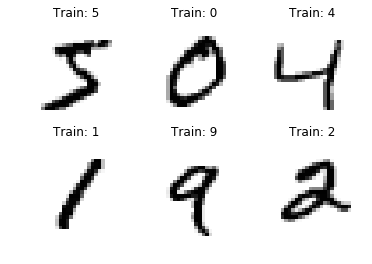

In [9]:
display_digits(plt, X_train, y_train, 0, 6, 2, 'Train')

Training and test data sets shape and correponding label arrays.

In [10]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Save copies of `X_test` and `y_test` for scoring in section [6. Score](#score) before reshaping them in section [3.1 Train the model](#train_sub).

In [11]:
X_test_score = X_test.copy()
y_test_score = y_test.copy()

## 3. Обучение и оценка модели <a id="train"></a>

In this section, you will build a Deep Learning (Keras) model, train it, and evaluate it.

Import the required package and modules.

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

### 3.1 Train the model <a id="train_sub"></a>

Set the parameters that are required for the Deep Learning (Keras) model.

In [13]:
batch_size = 128
num_classes = 10
epochs = 6

As you have seen in section [2. Обзор данных](#data), the image size is 28x28 pixels.

In [14]:
img_rows, img_cols = 28, 28

In [15]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Scale the digits to be in the range of [0-1] instead of [0-255].

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Convert the label arrays of training/test digit images into one hot format matrix.

Ex)  
0 => [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]  
2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  
.  
.  
.  

In [17]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

- Conv2D layer
    - The first 2D convolution layer has 32 output filters and the second 2D convolution layer has 64 output filters.
    - `kernel_size` specifies the height and width of the 2D convolution window.
    - `activation` is a non-linear function that applies to the output of the layer. `relu` (rectified linear unit) clamps all values below 0 to 0.
- MaxPooling layer
    - Max pooling basically moves a `m`x`n` window across a 2D input space where `m` and `n` are both 2 in this example. The max value within the window is the output.
- Dropout layer
    - Helps the model to avoid overfitting.
- Dense layer
    - A regular densely-connected Neural Network layer.
- Flatten layer
    - Flattens the input and doesn't affect the batch size.
- Adadelta 
    - Adapts learning rates based on a moving window of gradient updates instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates occur.

In [18]:
model = Sequential()
model.add(Conv2D(32, 
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Train the model with the parameters you set before.

In [19]:
history = model.fit(X_train,
          y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 438s 7ms/step - loss: 0.2708 - acc: 0.9164 - val_loss: 0.0645 - val_acc: 0.9794
Epoch 2/6
60000/60000 [==============================] - 434s 7ms/step - loss: 0.0894 - acc: 0.9739 - val_loss: 0.0413 - val_acc: 0.9864
Epoch 3/6
60000/60000 [==============================] - 440s 7ms/step - loss: 0.0663 - acc: 0.9805 - val_loss: 0.0329 - val_acc: 0.9888
Epoch 4/6
60000/60000 [==============================] - 438s 7ms/step - loss: 0.0549 - acc: 0.9836 - val_loss: 0.0338 - val_acc: 0.9884
Epoch 5/6
60000/60000 [==============================] - 432s 7ms/step - loss: 0.0469 - acc: 0.9859 - val_loss: 0.0275 - val_acc: 0.9911
Epoch 6/6
60000/60000 [==============================] - 437s 7ms/step - loss: 0.0411 - acc: 0.9875 - val_loss: 0.0274 - val_acc: 0.9915


Let's plot the model accuracy on the train and validation (test) data sets. You will plot the graphs in `R`'s `ggplot` style.

In [20]:
plt.style.use('ggplot')

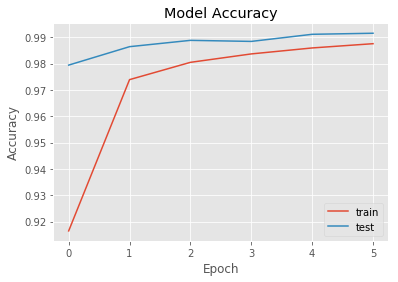

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

Let's plot the model loss on the train and validation (test) data sets.

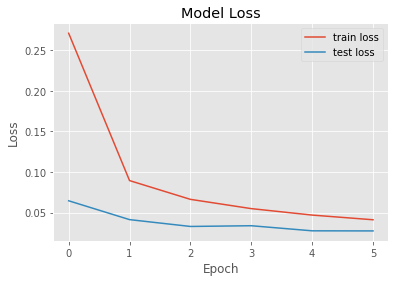

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

### 3.2 Evaluate the model

Let's evaluate the model.

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 18s 2ms/step


In [24]:
print('Test loss:', score[0])
print('Test accuracy: {:.2f}%'.format(score[1]*100))

Test loss: 0.0274077006388
Test accuracy: 99.15%


## 4. Сохранить модель локально <a id="save"></a>

In this section, you will learn how to save the train Deep Learning (Keras) model locally and compress it into a `.tgz` file.

First, save the Keras model locally.

In [25]:
from contextlib import suppress
import os

filename = 'keras_mnist_model.h5'

# Delete a duplicate file if exists.
with suppress(OSError):
    os.remove(filename)
    
model.save(filename)

Compress the Keras model file into a `.tgz` file. Make sure to add the `z` flag when running the `tar` command.

In [26]:
#compress keras model
tar_filename = filename + '.tgz'
cmdstring = 'tar -zcvf ' + tar_filename + ' ' + filename
os.system(cmdstring)

0

You can see that the model file (keras_mnist_model.h5) and its compressed version (keras_mnist_model.h5.tgz) are both saved in the local file system.

In [27]:
!ls

keras_mnist_model.h5  keras_mnist_model.h5.tgz


## 5. Создание online сервиса <a id="deploy"></a>

In this section, you learn how to deploy the compressed version - the `.tgz` file - of the trained model described in section [4. Save the model locally](#save) online.

First, let's instantiate a `WatsonMachineLearningAPIClient` object with your WML credentials.

In [28]:
client = WatsonMachineLearningAPIClient(wml_credentials)

Define metadata for the trained model in section [3. Train and evaluate the model](#train).

In [29]:
model_props = {
    client.repository.ModelMetaNames.NAME: 'MNIST - compressed keras model',
    client.repository.ModelMetaNames.FRAMEWORK_NAME: 'tensorflow',
    client.repository.ModelMetaNames.FRAMEWORK_VERSION: '1.5',
    client.repository.ModelMetaNames.RUNTIME_NAME: 'python',
    client.repository.ModelMetaNames.RUNTIME_VERSION: '3.5',
    client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES: [{'name':'keras', 'version': '2.1.3'}]
}

published_model_details = client.repository.store_model(model=tar_filename, meta_props=model_props)       

Get the `uid` for the trained model.

In [30]:
model_uid = client.repository.get_model_uid(published_model_details)
print(model_uid)

e4c13c2f-54a4-4a4d-831f-c16da6c2c984


You can deploy the stored model as a web service (online) by running the following code.

In [31]:
deployment = client.deployments.create(model_uid, 'Keras MNIST model deployment through compressed file.')



#######################################################################################

Synchronous deployment creation for uid: 'e4c13c2f-54a4-4a4d-831f-c16da6c2c984' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='6abc1274-aafb-4aa8-bb40-aeadb136e5d3'
------------------------------------------------------------------------------------------------




Let's list the deployed models.

In [32]:
client.deployments.list()

------------------------------------  -----------------------------------------------------  ------  --------------  ------------------------  --------------  -------------
GUID                                  NAME                                                   TYPE    STATE           CREATED                   FRAMEWORK       ARTIFACT TYPE
6abc1274-aafb-4aa8-bb40-aeadb136e5d3  Keras MNIST model deployment through compressed file.  online  DEPLOY_SUCCESS  2019-05-13T10:24:56.402Z  tensorflow-1.5  model
25f12284-f3f7-4e53-8056-ca6cc30749b3  Spark German Risk Deployment - Final                   online  DEPLOY_SUCCESS  2019-05-07T17:34:20.604Z  mllib-2.3       model
0d88457b-323e-482e-abab-f8c6d59a703d  Keras MNIST model deployment through compressed file.  online  DEPLOY_SUCCESS  2019-05-06T16:55:33.755Z  tensorflow-1.5  model
8014a430-e10e-4962-80e8-e70e8a84d6fe  GermanCreditRiskModel                                  online  DEPLOY_SUCCESS  2019-04-25T18:55:04.883Z  mllib-2.3       

## 6. Оценка данных <a id="score"></a>

In this section, you will learn how to score a test data record.

First, extract the scoring endpoint from the deployment details.

In [33]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/6b7a94a8-04af-4307-9ff1-7652d62f4b96/deployments/6abc1274-aafb-4aa8-bb40-aeadb136e5d3/online


The first digit of `X_test` will be used for scoring.

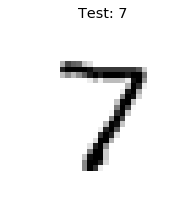

In [50]:
scoring_data = X_test[0].tolist()
display_digits(plt, X_test_score, y_test_score, 0, 1, 1, 'Test')

Map keys - 'fields' and 'values' - to their corresponding values in the `scoring payload` dictionary and score the model. However, only 'values' will be used in this example - map 'values' to `scoring_data` in the `scoring payload` dictionary .

In [51]:
scoring_payload = {'values': [scoring_data]}
scores = client.deployments.score(scoring_endpoint, scoring_payload)

In [52]:
print(str(scores));
#print(str(scoring_data))

{'values': [[[8.300466217137092e-12, 1.7977246080658205e-10, 3.239455281800474e-08, 2.269983312430668e-08, 3.3662651659216447e-12, 4.3404130116442285e-12, 7.076038067188356e-16, 1.0, 2.71018906101983e-12, 4.077174597938438e-09], 7, [8.300466217137092e-12, 1.7977246080658205e-10, 3.239455281800474e-08, 2.269983312430668e-08, 3.3662651659216447e-12, 4.3404130116442285e-12, 7.076038067188356e-16, 1.0, 2.71018906101983e-12, 4.077174597938438e-09]]], 'fields': ['prediction', 'prediction_classes', 'probability']}


As you can see in the following cell, the predicted label (`prediction_classes`) in the result of the above cell) and the true label are the same - `7`.

## 7. Выводы и следующие шаги <a id="summary"></a>

You successfully completed this notebook! 
 
You learned how to train, evaluate, and score a Keras model. You also learned how to deploy the model in a `.tgz` format via `watson-machine-learning-client` package.
 
Check out our <a href="https://dataplatform.ibm.com/docs/content/analyze-data/wml-setup.html" target="_blank" rel="noopener noreferrer">Online Documentation</a> for more samples, tutorials, documentation, how-tos, and blog posts.

### Автор

**Jihyoung Kim**, Ph.D., is a Data Scientist at IBM who strives to make data science easy for everyone through Watson Studio.

Copyright © 2019 IBM. This notebook and its source code are released under the terms of the MIT License.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>